In [1]:
import tensorflow as tf
from tensorflow import keras

## Load the data set

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Create the model

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]) 

## Run the model

In [10]:
history = model.fit(X_train, y_train,epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7152 - accuracy: 0.7663 - val_loss: 0.5451 - val_accuracy: 0.8048
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4869 - accuracy: 0.8310 - val_loss: 0.4463 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4422 - accuracy: 0.8471 - val_loss: 0.3994 - val_accuracy: 0.8634
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4137 - accuracy: 0.8560 - val_loss: 0.3980 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3935 - accuracy: 0.8620 - val_loss: 0.3749 - val_accuracy: 0.8714
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3776 - accuracy: 0.8669 - val_loss: 0.3634 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3632 - accuracy: 0.8728 - val_loss: 0.3684 - val_accuracy:

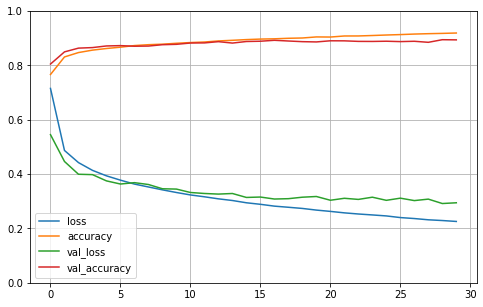

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8847


[0.3277169167995453, 0.8847000002861023]

In [16]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 14ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)